# Capstone Project - The Battle of the Neighbourhoods (Edmonton, Alberta, Canada)
------------------------------------------------------
##### *by Aarthi Velusamy* #####
### Applied Data Science


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

The aim of this project is to find a safe and secure location for opening of commercial establishments in Edmonton, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like **Grocery Store** in **Edmonton City**, Canada.

The first task would be to **choose the safest borough (region)** by analysing crime data for opening a grocery store and **short listing neighbourhoods**, where grocery stores are not amongst the most commom venues, and yet **in little to no crime neighbourhood**.

We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 15 most common venues in each neighborhood so that the best neighborhood where grocery store is not amongst the most common venue can be selected.

## Data <a name="data"></a>

Based on definition of the problem, factors that will influence our decision are:
* finding the safest borough based on crime statistics
* finding the most common venues
* choosing the right neighbourhood within the borough

We will find out the best neighborhood in Edmonton for entrepreneurs to open a Grocery store by:
* Using multiple datasets from different sources (i.e. Web, Geocode, CSV files, Foursquare API)
* Python Webscraping using Beautifulsoup
* Data Preprocessing
* Data Analysis

We will be using the geographical coordinates of Edmonton to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster the neighborhoods and present my findings.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a real world data set from Open Data containing the Edmonton Neighborhood Crimes from 2009 to 2019](#part1):  A dataset consisting of the crime statistics of each Neighbourhood in Edmonton along with type of violation(crime), reported year, quarter, month and number of occurrences.

- [**Part 2**: Gathering additional information of the list of officially categorized boroughs in Edmonton from Wikipedia.](#part2): Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

- [**Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.](#part3): This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

- [**Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.](#part4): This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

### **Part 1:** Using a real world data set from Open Data containing the Edmonton Neighbourhood Crimes from 2009 to 2019<a name="part1"></a>


####  Edmonton Crime Report 

Properties of the Crime Report

*   Neighbourhood Description (Occurrence)
*   Occurrence Violation Type Group
*   Occurrence Reported Year
*   Occurrence Reported Quarter
*   Occurrence Reported Month
*   #Of Occurrences

Data set URL: https://dashboard.edmonton.ca/dataset/EPS-Neighbourhood-Criminal-Occurrences/xthe-mnvi

### Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.3.2
Libraries imported


In [2]:
# import webscraping library
!pip install beautifulsoup4
from bs4 import BeautifulSoup
print("Beautifulsoup imported")

     |████████████████████████████████| 122kB 9.1MB/s eta 0:00:01
Beautifulsoup imported


In [3]:
!pip install lxml

     |████████████████████████████████| 5.5MB 6.2MB/s eta 0:00:01     |█████                           | 880kB 6.2MB/s eta 0:00:010:00:01


In [4]:
!pip install html5lib

### Reading from the Dataset

### Gathering Edmonton Neighbourhood crime dataset exported from the open data site<a name="part1"></a>
##### Edmonton Police Service (EPS) crimedataset [Wikipedia page](https://dashboard.edmonton.ca/dataset/EPS-Neighbourhood-Criminal-Occurrences/xthe-mnvi)

In [107]:
edm_crime_df = pd.read_csv('https://raw.githubusercontent.com/Aarthiv18/Capstone/main/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods/EPS_Neighbourhood_Criminal_Occurrences.csv', index_col=None)
print("Dataset read completed")

Dataset read completed


In [108]:
edm_crime_df.head()

,Neighbourhood Description (Occurrence),Occurrence Violation Type Group,Occurrence Reported Year,Occurrence Reported Quarter,Occurrence Reported Month,# Occurrences
0,ABBOTTSFIELD,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Assault,2009,Q2,5,6


#### Modifying the name of columns

In [109]:
edm_crime_df.columns = ['Neighbourhood', 'Crime Type','Year','Quarter','Month','Number Of Occurences']
edm_crime_df.head()

,Neighbourhood,Crime Type,Year,Quarter,Month,Number Of Occurences
0,ABBOTTSFIELD,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Assault,2009,Q2,5,6


### Total Crimes in different Neighbourhoods

In [110]:
edm_crime_df['Neighbourhood'].value_counts()

Not Entered                 893
DOWNTOWN                    861
BOYLE STREET                790
OLIVER                      788
CENTRAL MCDOUGALL           784
                           ... 
CPR WEST                      2
RURAL NORTH WEST              1
RIVER VALLEY CAMERON          1
ANTHONY HENDAY CLAREVIEW      1
CLAREVIEW BUSINESS PARK       1
Name: Neighbourhood, Length: 393, dtype: int64

In [111]:
#list unique values in df column Neighbourhood
edm_crime_df.Neighbourhood.unique()

array(['ABBOTTSFIELD', 'ALBERTA AVENUE', 'ALDERGROVE', 'ALLENDALE',
       'AMBLESIDE', 'ANTHONY HENDAY', 'ANTHONY HENDAY BIG LAKE',
       'ANTHONY HENDAY SOUTH EAST', 'ANTHONY HENDAY SOUTH WEST', 'ARGYLL',
       'ARMSTRONG INDUSTRIAL', 'ATHLONE', 'AVONMORE', 'BALWIN',
       'BANNERMAN', 'BARANOW', 'BATURYN', 'BEACON HEIGHTS', 'BEARSPAW',
       'BEAUMARIS', 'BELGRAVIA', 'BELLE RIVE', 'BELLEVUE', 'BELMEAD',
       'BELMONT', 'BELVEDERE', 'BERGMAN', 'BEVERLY HEIGHTS', 'BISSET',
       'BLACKBURNE', 'BLACKMUD CREEK', 'BLUE QUILL', 'BONNIE DOON',
       'BOYLE STREET', 'BRANDER GARDENS', 'BRECKENRIDGE GREENS',
       'BRINTNELL', 'BRITANNIA YOUNGSTOWN', 'BROOKSIDE',
       'BROWN INDUSTRIAL', 'BULYEA HEIGHTS', 'CAERNARVON', 'CALDER',
       'CALGARY TRAIL NORTH', 'CALGARY TRAIL SOUTH', 'CALLINGWOOD NORTH',
       'CALLINGWOOD SOUTH', 'CANON RIDGE', 'CANORA', 'CANOSSA',
       'CAPILANO', 'CARLETON SQUARE INDUSTRIAL', 'CARLISLE', 'CARLTON',
       'CASSELMAN', 'CENTRAL MCDOUGALL', 'CHAM

In [112]:
edm_crime_df.isnull().sum()

Neighbourhood           0
Crime Type              0
Year                    0
Quarter                 0
Month                   0
Number Of Occurences    0
dtype: int64

In [113]:
edm_crime_df.shape

(113077, 6)

##### Further Cleaning the data by dropping rows with invalid data

In [114]:
edm_crime_df1=edm_crime_df[edm_crime_df != 'Not Entered']

In [115]:
# Top 30 Neighbourhood high in crime rate
edm_crime_df1['Neighbourhood'].value_counts().head(30)

DOWNTOWN                861
BOYLE STREET            790
OLIVER                  788
CENTRAL MCDOUGALL       784
MCCAULEY                770
ALBERTA AVENUE          750
STRATHCONA              731
EASTWOOD                722
QUEEN MARY PARK         713
SUMMERLEA               711
INGLEWOOD               697
SPRUCE AVENUE           690
BELVEDERE               689
EMPIRE PARK             663
PARKDALE                657
MONTROSE                644
QUEEN ALEXANDRA         642
GARNEAU                 640
GLENWOOD                637
CALDER                  635
WESTWOOD                623
BONNIE DOON             621
WESTMOUNT               618
BRITANNIA YOUNGSTOWN    617
CANORA                  615
CALLINGWOOD SOUTH       611
BEACON HEIGHTS          607
KILLARNEY               606
BALWIN                  600
GLENGARRY               597
Name: Neighbourhood, dtype: int64

In [116]:
edm_crime_df1.shape

(113077, 6)

### **Part 2:** Gathering additional information of officially categorized boroughs in Edmonton from Wikipedia<a name="part2"></a>

##### As part of data set Borough which the neighborhood was part of, is not categorized, so separate csv file was created based on the data in the following wikipedia page [Wikipedia page](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Edmonton).

In [117]:
edm_neigh_bor = pd.read_csv('https://raw.githubusercontent.com/Aarthiv18/Capstone/main/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods/Borough.csv', index_col=None)
print("Dataset read completed")

Dataset read completed


In [118]:
edm_neigh_bor.head()

,Neighbourhood Description (Occurrence),Borough,Area
0,ABBOTTSFIELD,East,Beverly
1,ALBANY,North,The Palisades
2,ALBERTA AVENUE,East,The Avenue
3,ALBERTA PARK INDUSTRIAL,Northwest,Northwest Industrial
4,ALDERGROVE,West,West Jasper Place


In [119]:
edm_neigh_bor.Area.unique()

array(['Beverly', 'The Palisades', 'The Avenue', 'Northwest Industrial',
       'West Jasper Place', 'Heritage Valley', 'Greater Strathcona',
       'Windermere', 'Transportation and utility corridor', 'Mill Creek',
       nan, 'The Meadows', 'Clareview', 'Castle Downs', 'Yellowbird',
       'Lake District', 'Greater Highlands', 'Ridgewood',
       'Whitemud Creek Ravine and southwest sector', 'Blue Quill',
       'Greater Bonnie Doon', 'Central core north', 'Riverbend',
       'Lewis Farms', 'Pilot Sound', 'Jasper Place', 'Hermitage',
       'Greater Hardisty', 'Northeast Industrial', 'Central core south',
       'Southeast Industrial', 'Southwood', 'Casselman-Steele Heights',
       'Knottwood', 'Ellerslie', 'Dickinsfield', 'Horse Hill',
       'The Grange', 'Woodvale', 'Goodridge Corners',
       'Terwillegar Heights', 'Big Lake', 'Burnewood', 'Lakewood',
       'Londonderry', 'Millbourne', 'Millhurst', 'Mill Woods Centre',
       'North Saskatchewan River valley', 'Riverview'], dty

In [120]:
edm_neigh_bor['Area'] = edm_neigh_bor['Area'].str.replace('Whitemud Creek Ravine and southwest sector', 'Whitemud Creek Ravine')
edm_neigh_bor.Area.unique()

array(['Beverly', 'The Palisades', 'The Avenue', 'Northwest Industrial',
       'West Jasper Place', 'Heritage Valley', 'Greater Strathcona',
       'Windermere', 'Transportation and utility corridor', 'Mill Creek',
       nan, 'The Meadows', 'Clareview', 'Castle Downs', 'Yellowbird',
       'Lake District', 'Greater Highlands', 'Ridgewood',
       'Whitemud Creek Ravine', 'Blue Quill', 'Greater Bonnie Doon',
       'Central core north', 'Riverbend', 'Lewis Farms', 'Pilot Sound',
       'Jasper Place', 'Hermitage', 'Greater Hardisty',
       'Northeast Industrial', 'Central core south',
       'Southeast Industrial', 'Southwood', 'Casselman-Steele Heights',
       'Knottwood', 'Ellerslie', 'Dickinsfield', 'Horse Hill',
       'The Grange', 'Woodvale', 'Goodridge Corners',
       'Terwillegar Heights', 'Big Lake', 'Burnewood', 'Lakewood',
       'Londonderry', 'Millbourne', 'Millhurst', 'Mill Woods Centre',
       'North Saskatchewan River valley', 'Riverview'], dtype=object)

##### Further Cleaning the data by dropping rows with invalid data

In [121]:
edm_neigh_bor.isnull().sum()

Neighbourhood Description (Occurrence)     0
Borough                                   27
Area                                      88
dtype: int64

In [122]:
edm_neigh_bor.shape

(389, 3)

In [123]:
edm_neigh_bor1=edm_neigh_bor[edm_neigh_bor['Borough'].notna()]

In [124]:
edm_neigh_bor1.shape

(362, 3)

In [125]:
edm_neigh_bor1.columns = ['Neighbourhood','Borough', 'Area']
edm_neigh_bor1.head()

,Neighbourhood,Borough,Area
0,ABBOTTSFIELD,East,Beverly
1,ALBANY,North,The Palisades
2,ALBERTA AVENUE,East,The Avenue
3,ALBERTA PARK INDUSTRIAL,Northwest,Northwest Industrial
4,ALDERGROVE,West,West Jasper Place


### Gathering Latitude, longitude and Postal code information about the Neighborhood from Wikipedia

##### Data webscraped from the following page [Wikipedia page](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T).

In [126]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T')[1]
#print(table)
postcode=pd.DataFrame(table)
#postcode.head(10)
postcode

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned


#### Further cleaning the data to include only Edmonton Postal codes

In [127]:
postcode1=postcode.loc[postcode['Borough']=='Edmonton']
postcode1.shape

(39, 5)

#### Split column neighbourhood into multiple rows in pandas dataframe

In [128]:
postcode1=postcode.loc[postcode['Borough']=='Edmonton']
#postcode1.shape
postcode1 = (postcode1.set_index(['Postal Code', 'Borough', 'Latitude', 'Longitude'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 
#postcode1
Neighlist= postcode1['Neighborhood'].tolist()
print(f"\nNeigh list:\n{Neighlist}\ntype:{type(Neighlist)}")



Neigh list:
['West Clareview', ' East Londonderry', 'North Capilano', 'East North Central', ' West Beverly', 'SE Capilano', ' West Southeast Industrial', ' East Bonnie Doon', 'Central Londonderry', 'Central Bonnie Doon', 'West Londonderry', ' East Calder', 'South Bonnie Doon', ' East University', 'North Central', ' Queen Mary Park', ' Blatchford', 'West University', ' Strathcona Place', 'NorthDowntown Fringe', ' East Downtown Fringe', 'Southgate', ' North Riverbend', 'North Downtown', 'Kaskitayo', ' Aspen Gardens', 'South Downtown', ' South Downtown Fringe (Alberta Provincial Government)', 'West Mill Woods', 'North Westmount', ' West Calder', ' East Mistatim', 'East Mill Woods', 'South Westmount', ' Groat Estate', ' East Northwest Industrial', 'Southwest Edmonton', 'Glenora', ' SW Downtown Fringe', 'South Industrial', 'North Jasper Place', 'East Southeast Industrial', ' South Clover Bar', 'Central Jasper Place', ' Buena Vista', 'Southgate', ' North Riverbend', 'West Northwest Industri

### Merging the Crime data Table to include Boroughs and Area

In [129]:
edm_boroughs_crime = pd.merge(edm_crime_df1,edm_neigh_bor1, on='Neighbourhood')
edm_boroughs_crime.head()

,Neighbourhood,Crime Type,Year,Quarter,Month,Number Of Occurences,Borough,Area
0,ABBOTTSFIELD,Assault,2009,Q1,1,3,East,Beverly
1,ABBOTTSFIELD,Assault,2009,Q1,2,5,East,Beverly
2,ABBOTTSFIELD,Assault,2009,Q1,3,2,East,Beverly
3,ABBOTTSFIELD,Assault,2009,Q2,4,2,East,Beverly
4,ABBOTTSFIELD,Assault,2009,Q2,5,6,East,Beverly


##### Rearranging the column sequence

In [130]:
edm_bor_crime=edm_boroughs_crime[['Neighbourhood','Area','Borough','Crime Type','Year','Quarter','Month','Number Of Occurences']]
edm_bor_crime.head()

,Neighbourhood,Area,Borough,Crime Type,Year,Quarter,Month,Number Of Occurences
0,ABBOTTSFIELD,Beverly,East,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Beverly,East,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Beverly,East,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Beverly,East,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Beverly,East,Assault,2009,Q2,5,6


In [131]:
pivot_count = edm_bor_crime.pivot_table(values="Neighbourhood", index="Borough", aggfunc=pd.Series.nunique)
print(pivot_count)

           Neighbourhood
Borough                 
Central               13
East                  19
North                 45
Northeast             30
Northwest             43
South                 36
Southeast             64
Southwest             50
West                  62


In [132]:
edm_bor_crime.pivot_table(
        values='Neighbourhood', 
        index=['Borough', 'Area'], 
        
        aggfunc=pd.Series.nunique)

Neighbourhood
Borough   Area                                              
Central   Central core north                               8
          Central core south                               4
East      Beverly                                          5
          Greater Highlands                                6
          The Avenue                                       7
North     Castle Downs                                    10
          Dickinsfield                                     2
          Goodridge Corners                                1
          Lake District                                    8
          Londonderry                                      2
          The Palisades                                    6
          Transportation and utility corridor              2
Northeast Casselman-Steele Heights                         4
          Clareview                                        8
          Hermitage                                        3
          Horse Hill                                       1
          Northeast Industrial                             4
          Pilot Sound                                      5
          Transportation and utility corridor              3
Northwest Big Lake                                         2
          Northwest Industrial                            32
          Transportation and utility corridor              3
South     Greater Bonnie Doon                              8
          Greater Hardisty                                 3
          Greater Strathcona                              11
          Mill Creek                                       5
Southeast Burnewood                                        2
          Ellerslie                                        3
          Knottwood                                        3
          Lakewood                                         3
          Mill Woods Centre                                2
          Millbourne                                       4
          Millhurst                                        2
          Northeast Industrial                             1
          Ridgewood                                        3
          Southeast Industrial                            21
          Southwood                                        3
          The Meadows                                      7
          Transportation and utility corridor              1
          Woodvale                                         2
Southwest Blue Quill                                       4
          Heritage Valley                                 15
          Riverbend                                        9
          Terwillegar Heights                              7
          Whitemud Creek Ravine                            3
          Windermere                                       5
          Yellowbird                                       2
West      Jasper Place                                    14
          Lewis Farms                                      7
          North Saskatchewan River valley                  1
          Riverview                                        2
          The Grange                                       3
          Transportation and utility corridor              2
          West Jasper Place                               17

##### Further Cleaning the data by dropping rows with invalid data

In [133]:
edm_bor_crime.isnull().sum()

Neighbourhood               0
Area                    18624
Borough                     0
Crime Type                  0
Year                        0
Quarter                     0
Month                       0
Number Of Occurences        0
dtype: int64

In [134]:
edm_bor_crime.count()

Neighbourhood           108716
Area                     90092
Borough                 108716
Crime Type              108716
Year                    108716
Quarter                 108716
Month                   108716
Number Of Occurences    108716
dtype: int64

In [135]:
edm_bor_crime=edm_bor_crime[edm_bor_crime['Area'].notna()]

In [136]:
edm_bor_crime=edm_bor_crime[edm_bor_crime['Borough'] != 'Mature area']

In [137]:
edm_bor_crime.count()

Neighbourhood           90092
Area                    90092
Borough                 90092
Crime Type              90092
Year                    90092
Quarter                 90092
Month                   90092
Number Of Occurences    90092
dtype: int64

In [138]:
edm_bor_crime.isnull().sum()

Neighbourhood           0
Area                    0
Borough                 0
Crime Type              0
Year                    0
Quarter                 0
Month                   0
Number Of Occurences    0
dtype: int64

In [139]:
# checking the df datatype
edm_bor_crime.dtypes

Neighbourhood           object
Area                    object
Borough                 object
Crime Type              object
Year                     int64
Quarter                 object
Month                    int64
Number Of Occurences     int64
dtype: object

## Methodology<a name="methodology"></a>

Categorized the methodology section into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the crime repots in different Edmonton boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

### Exploratory Data Analysis

#### Overview of Edmonton Boroughs (Geographical sectors) and neighbourhood

In [140]:
print('Edmonton has {} Geographical Regions and {} neighborhoods.'.format(
        len(edm_bor_crime['Borough'].unique()),
        len(edm_bor_crime['Neighbourhood'].unique()),
    )
)


Edmonton has 9 Geographical Regions and 301 neighborhoods.


#### Pivoting the table to better understand the data by crimes per borough (region)

In [141]:
edm_crime_pivot = pd.pivot_table(edm_bor_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Crime Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)#.sort_values('All', ascending=False).drop('All', axis=1).sort_values('All', ascending=False, axis=1).drop('All') # sort by row and column sum
edm_crime_pivot.sort_values(by=('Year', 'All'), ascending=False,inplace=True)
edm_crime_pivot.reset_index(inplace = True)
edm_crime_pivot.columns = edm_crime_pivot.columns.map(''.join)
edm_crime_pivot.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_pivot
edm_crime_piv = edm_crime_pivot.iloc[1:]
                                
edm_crime_piv
#edm_crime_pivot_sort = edm_crime_pivot.reindex(edm_crime_pivot['Year'].sort_values(by=Year, ascending=False).index)

,Borough,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
1,Southeast,3227,3856,22,794,712,4617,3278,644,17150
2,West,2670,2917,21,1080,757,3475,2437,303,13660
3,South,1865,2507,10,696,503,2726,1891,243,10441
4,North,1741,2026,19,593,467,2656,1893,256,9651
5,East,1920,1853,40,1029,658,2006,1756,196,9458
6,Northeast,1731,1548,8,481,413,2167,1641,212,8201
7,Central,1277,1335,53,967,772,1372,1175,330,7281
8,Southwest,1170,1839,11,335,246,2223,1143,286,7253
9,Northwest,742,1876,5,122,112,2124,1519,497,6997


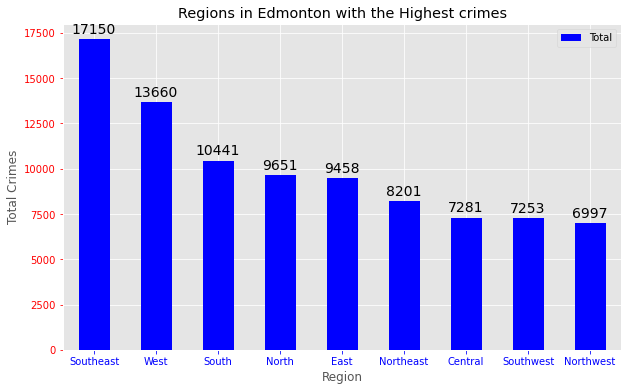

In [142]:
per_region = edm_crime_piv[['Borough','Total']]

per_region.set_index('Borough',inplace = True)

ax = per_region.plot(kind='bar', figsize=(10, 6), rot=0, color='b')

ax.set_ylabel('Total Crimes')
ax.set_xlabel('Region')
ax.set_title('Regions in Edmonton with the Highest crimes')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [143]:
#edm_crime_pivot.reset_index(inplace = True)
edm_crime_pivot.columns = edm_crime_pivot.columns.map(''.join)
edm_crime_pivot.rename(columns={'Borough':'Region',
                              'YearAssault' : 'Assault',
                              'YearBreak and Enter' : 'Break and Enter',
                              'YearHomicide' : 'Homicide',
                              'YearRobbery' : 'Robbery',
                              'YearSexual Assaults' : 'Sexual Assaults',
                              'YearTheft From Vehicle' : 'Theft from Vehicle',
                              'YearTheft Of Vehicle' : 'Theft Of Vehicle',
                              'YearTheft Over $5000' : 'Theft Over $5000'}, inplace=True)
# To ignore bottom All in Borough
edm_crime_pivot1 = edm_crime_pivot.tail(9)
edm_crime_pivot1 = edm_crime_pivot1.iloc[:, :-1]
edm_crime_pivot1

,Region,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft from Vehicle,Theft Of Vehicle,Theft Over $5000
1,Southeast,3227,3856,22,794,712,4617,3278,644
2,West,2670,2917,21,1080,757,3475,2437,303
3,South,1865,2507,10,696,503,2726,1891,243
4,North,1741,2026,19,593,467,2656,1893,256
5,East,1920,1853,40,1029,658,2006,1756,196
6,Northeast,1731,1548,8,481,413,2167,1641,212
7,Central,1277,1335,53,967,772,1372,1175,330
8,Southwest,1170,1839,11,335,246,2223,1143,286
9,Northwest,742,1876,5,122,112,2124,1519,497


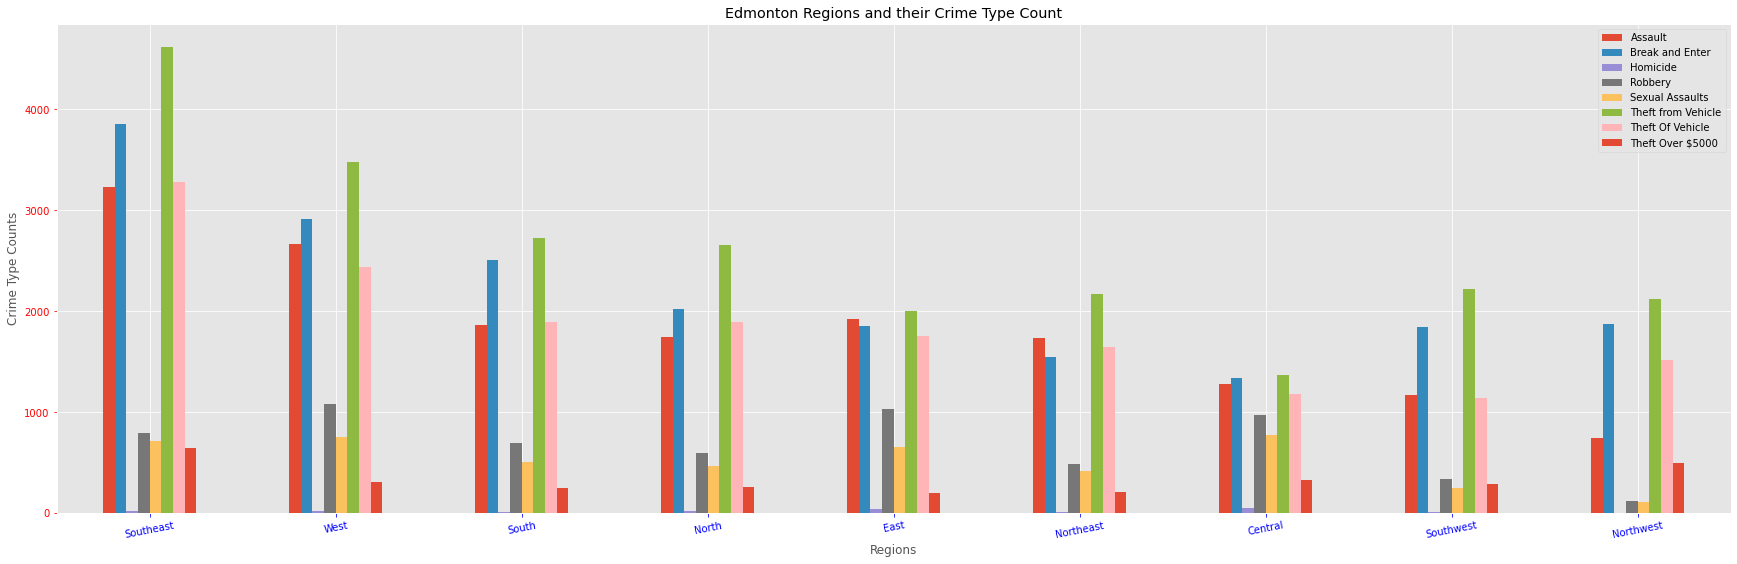

In [144]:
ploh = edm_crime_pivot1[['Region','Assault','Break and Enter','Homicide','Robbery','Sexual Assaults','Theft from Vehicle','Theft Of Vehicle','Theft Over $5000']]
ploh.set_index('Region',inplace = True)
#edm_crime_pivot.plot.bar(rot=0)
ax=ploh.plot(kind='bar',figsize=(30, 9), rot=11)
#set descriptions
ax.set_ylabel('Crime Type Counts')
ax.set_xlabel('Regions')
ax.set_title('Edmonton Regions and their Crime Type Count')
#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')


plt.show()

In [145]:
edm_tot = pd.pivot_table(edm_bor_crime,
                               
                               index=['Crime Type'],
                              
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
edm_tot
edm_crime_df

,Neighbourhood,Crime Type,Year,Quarter,Month,Number Of Occurences
0,ABBOTTSFIELD,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Assault,2009,Q2,5,6
...,...,...,...,...,...,...
113072,YORK,Theft Over $5000,2019,Q1,1,2
113073,YORK,Theft Over $5000,2019,Q2,6,1
113074,YORK,Theft Over $5000,2019,Q3,8,2
113075,YOUNGSTOWN INDUSTRIAL,Theft Over $5000,2019,Q2,5,1


#### Pivoting the table to better understand the data by crimes per neighbourhood

In [146]:
edm_crime_pivot1 = pd.pivot_table(edm_bor_crime,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Crime Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
edm_crime_pivot1.sort_values(by=('Year', 'All'), ascending=False,inplace=True)
edm_crime_pivot1.reset_index(inplace = True)
edm_crime_pivot1.columns = edm_crime_pivot1.columns.map(''.join)
edm_crime_pivot1.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_pivot1.head(30)

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
0,All,16343,19757,189,6097,4640,23366,16733,2967,90092
1,DOWNTOWN,131,131,12,131,117,131,130,78,861
2,BOYLE STREET,131,126,10,117,113,131,125,37,790
3,OLIVER,131,130,7,119,97,130,129,45,788
4,CENTRAL MCDOUGALL,131,125,7,119,102,131,126,43,784
5,MCCAULEY,131,127,10,125,100,130,126,21,770
6,ALBERTA AVENUE,131,131,12,116,81,131,130,18,750
7,STRATHCONA,130,130,2,109,75,131,126,28,731
8,EASTWOOD,131,130,3,121,65,126,128,18,722
9,QUEEN MARY PARK,131,128,4,94,69,131,130,26,713


##### To view some basic statistical details on pivot results

In [147]:
edm_crime_pivot.describe()

,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft from Vehicle,Theft Of Vehicle,Theft Over $5000,Total
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,3268.600000,3951.400000,37.80000,1219.400000,928.000000,4673.20000,3346.600000,593.400000,18018.400000
std,4649.263722,5602.422238,55.21433,1741.306866,1322.515616,6629.18726,4744.709433,845.514203,25525.809606
min,742.000000,1335.000000,5.00000,122.000000,112.000000,1372.00000,1143.000000,196.000000,6997.000000
25%,1390.500000,1842.500000,10.25000,509.000000,426.500000,2134.75000,1549.500000,246.250000,7511.000000
50%,1803.000000,1951.000000,20.00000,745.000000,580.500000,2439.50000,1823.500000,294.500000,9554.500000
75%,2482.500000,2814.500000,35.50000,1013.500000,745.750000,3287.75000,2301.000000,455.250000,12855.250000
max,16343.000000,19757.000000,189.00000,6097.000000,4640.000000,23366.00000,16733.000000,2967.000000,90092.000000


#### Exploring the data by Visualising

##### Top 5 Neighbourhood in Edmonton with the highest crime

In [148]:
edm_crime_pivot1.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

edm_crime_top5 = edm_crime_pivot1.iloc[1:6]
edm_crime_top5

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
1,DOWNTOWN,131,131,12,131,117,131,130,78,861
2,BOYLE STREET,131,126,10,117,113,131,125,37,790
3,OLIVER,131,130,7,119,97,130,129,45,788
4,CENTRAL MCDOUGALL,131,125,7,119,102,131,126,43,784
5,MCCAULEY,131,127,10,125,100,130,126,21,770


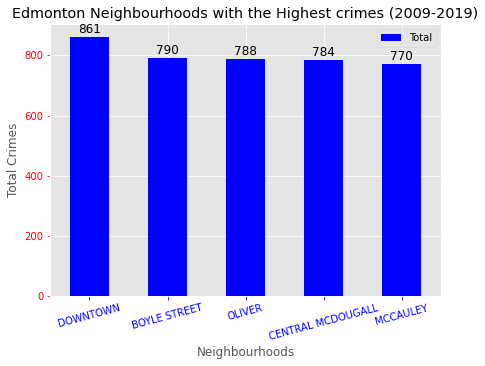

In [149]:
Top5_crime_neigh = edm_crime_top5[['Neighbourhood','Total']]
Top5_crime_neigh.set_index('Neighbourhood',inplace = True)

#plot the data
my_colors = 'b'
ax = Top5_crime_neigh.plot(kind='bar', figsize=(7, 5), rot=15, color=my_colors)

#set descriptions
ax.set_ylabel('Total Crimes')
ax.set_xlabel('Neighbourhoods')
ax.set_title('Edmonton Neighbourhoods with the Highest crimes (2009-2019)')

#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(str(p.get_height()), #annotate bar with values ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

##### Area with the lowest crime

In [150]:
edm_crime_area = pd.pivot_table(edm_bor_crime,
                               values=['Year'],
                               index=['Area'],
                               columns=['Crime Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
edm_crime_area.sort_values(by=('Year', 'All'), ascending=True,inplace=True)
edm_crime_area.reset_index(inplace = True)
edm_crime_area.columns = edm_crime_area.columns.map(''.join)
edm_crime_area.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_area

,Area,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
0,North Saskatchewan River valley,0,0,0,0,0,0,1,0,1
1,Riverview,3,13,0,0,1,6,3,3,29
2,Whitemud Creek Ravine,9,1,0,0,1,22,2,0,35
3,Big Lake,8,43,0,0,0,55,21,14,141
4,Horse Hill,57,41,0,5,15,42,30,3,193
5,Transportation and utility corridor,113,35,0,9,10,74,51,15,307
6,Goodridge Corners,80,106,0,18,19,101,71,15,410
7,Yellowbird,103,123,1,59,15,168,112,17,598
8,Woodvale,141,126,1,23,28,184,112,3,618
9,Burnewood,159,129,1,30,35,198,133,18,703


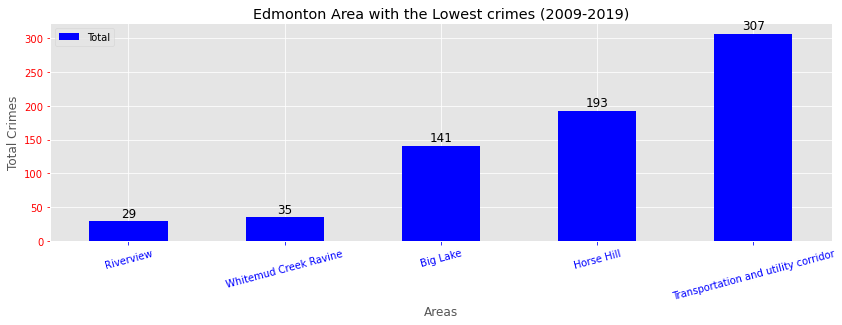

In [151]:
edm_areacrime_bot5 = edm_crime_area.iloc[1:6]
bot5_crime_area = edm_areacrime_bot5[['Area','Total']]
bot5_crime_area.set_index('Area',inplace = True)

#plot the data
my_colors = 'b'
ax = bot5_crime_area.plot(kind='bar', figsize=(14, 4), rot=15, color=my_colors)

#set descriptions
ax.set_ylabel('Total Crimes')
ax.set_xlabel('Areas')
ax.set_title('Edmonton Area with the Lowest crimes (2009-2019)')

#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(str(p.get_height()), #annotate bar with values ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

           Neighbourhood
Borough                 
Central               13
East                  19
North                 45
Northeast             30
Northwest             43
South                 36
Southeast             64
Southwest             50
West                  62


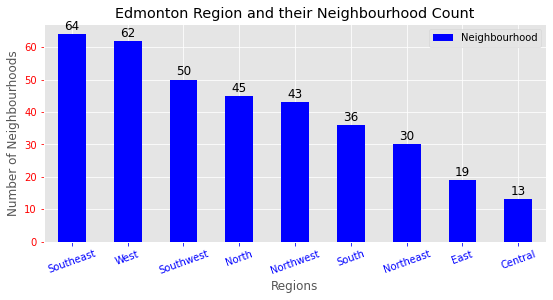

In [152]:
print(pivot_count)
pivot_count = pivot_count.sort_values(['Neighbourhood'], ascending = False, axis = 0)
ax=pivot_count.plot(kind='bar',figsize=(9, 4), rot=20, color=my_colors)
#set descriptions
ax.set_ylabel('Number of Neighbourhoods')
ax.set_xlabel('Regions')
ax.set_title('Edmonton Region and their Neighbourhood Count')
#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
for p in ax.patches:
    ax.annotate(str(p.get_height()), #annotate bar with values ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

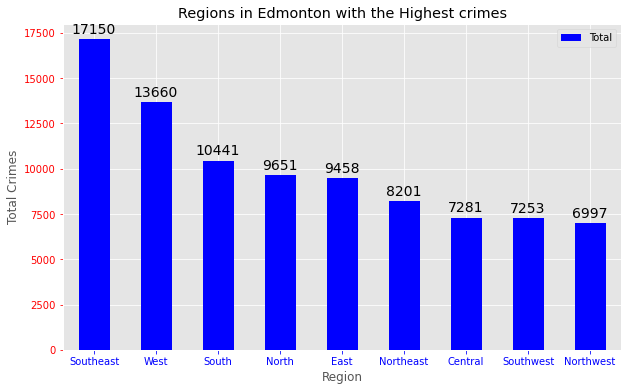

In [153]:
per_region = edm_crime_piv[['Borough','Total']]

per_region.set_index('Borough',inplace = True)

ax = per_region.plot(kind='bar', figsize=(10, 6), rot=0, color='b')

ax.set_ylabel('Total Crimes')
ax.set_xlabel('Region')
ax.set_title('Regions in Edmonton with the Highest crimes')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Based on exploratory data analysis it is clear that Northwest has the lowest crimes. Next to northwest is Southwest and Central with minimal increase in crime rate compared to Northwest.

##### **Northwest** has *43 Neighbourhoods* opening a commercial establishment in this region is an optimal idea. However **Southwest** has *50 neighbourhoods* that has bottom *2nd position* in the crime rate and Central has only 13 neighbourhoods that holds bottom 3rd position in the crime rate.  Lets compare different types of crime recorded in Northwest and Southwest to further support our decision making process.

#### Different types of crimes recorded in the Northwest, Southwest, Central Regions

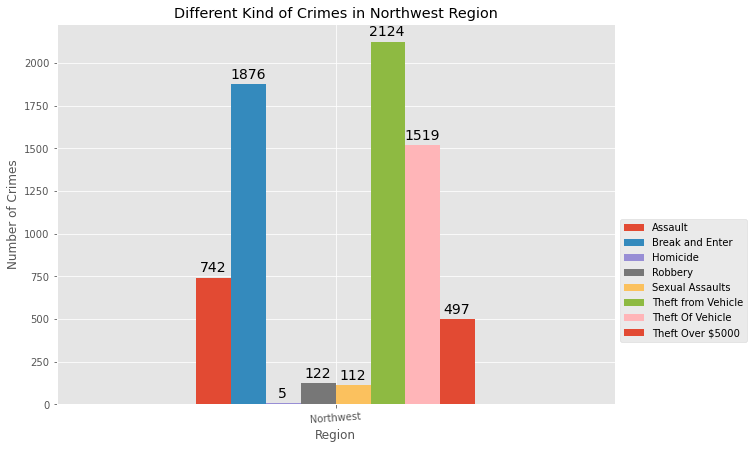

In [154]:
edm_nw_df = edm_crime_pivot[edm_crime_pivot['Region'] == 'Northwest']
#edm_nw_df=edm_crime_pivot.iloc[7:3]
#print(edm_nw_df)

edm_nw_df = edm_nw_df.sort_values(['Total'], ascending = True, axis = 0)

edm_nw = edm_nw_df[['Region','Assault', 'Break and Enter','Homicide','Robbery',
                 'Sexual Assaults','Theft from Vehicle','Theft Of Vehicle',
                 'Theft Over $5000']]


edm_nw.set_index('Region',inplace = True)

ax = edm_nw.plot(kind='bar', figsize=(10, 7), rot=4)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Region')
ax.set_title('Different Kind of Crimes in Northwest Region')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### Lets compare crime types for the bottom 3 region with less crime

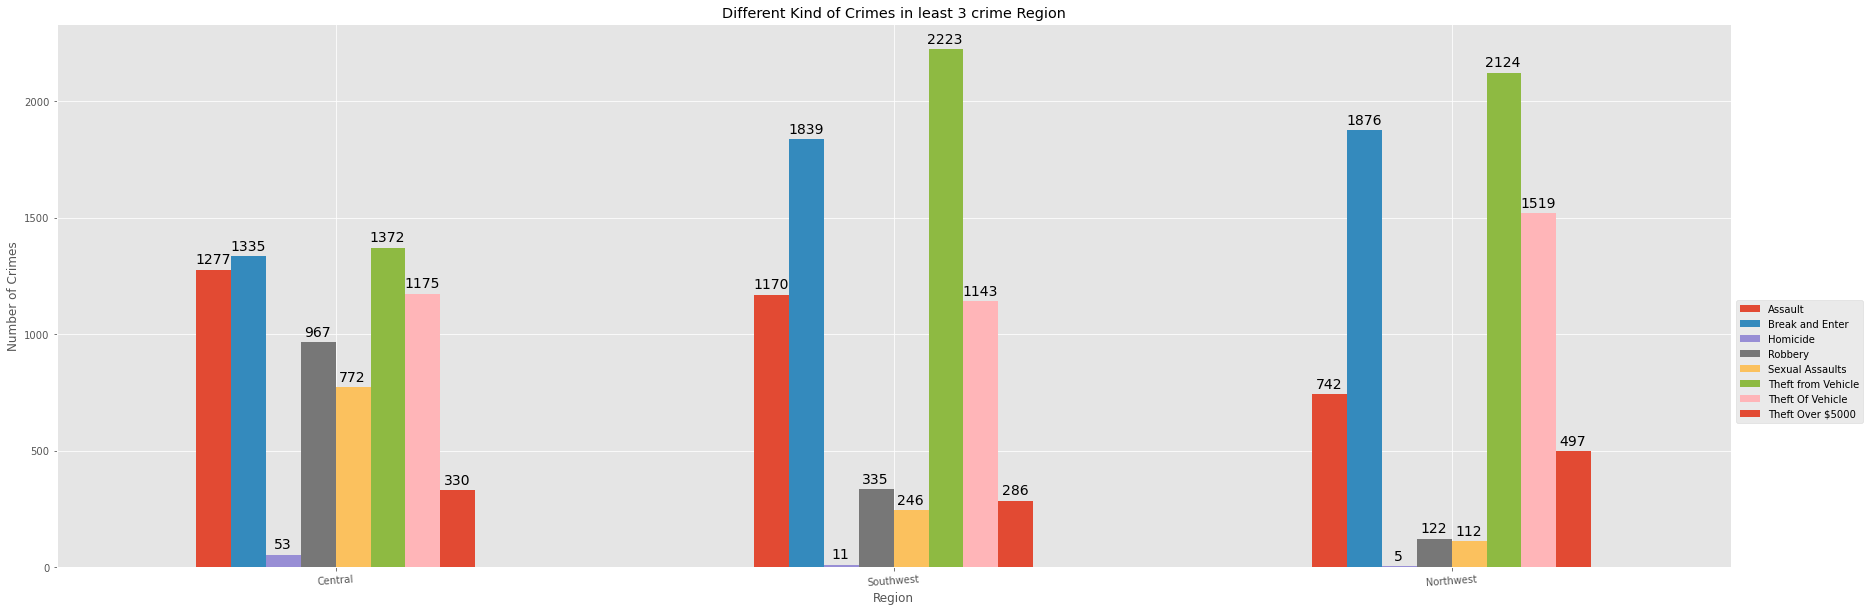

In [155]:

edm_nw_df=edm_crime_pivot.iloc[7:10]
edm_nw1 = edm_nw_df[['Region','Assault', 'Break and Enter','Homicide','Robbery',
                 'Sexual Assaults','Theft from Vehicle','Theft Of Vehicle',
                 'Theft Over $5000']]
edm_nw1.set_index('Region',inplace = True)
ax = edm_nw1.plot(kind='bar', figsize=(30, 10), rot=4)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Region')
ax.set_title('Different Kind of Crimes in least 3 crime Region')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### *Southwest has more neighbourhoods when compared to Northwest* and moreover the crime type *Break and enter is also low compared to Northwest* which makes **Southwest** region ideal destination for opening of commercial establishments like Grocery store.

### **Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.<a name="part3"></a>: 

#### This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

##### Restricting the rows in the data frame to only those with Southwest side as Borough (Region)

In [156]:
edm_sw_neigh = edm_boroughs_crime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
edm_sw_neigh = edm_sw_neigh[edm_sw_neigh['Borough'] == 'Southwest']
edm_sw_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in Southwest Borough', len(edm_sw_neigh['Neighbourhood'].unique()))

edm_sw_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in Southwest Borough 50


array(['AMBLESIDE', 'BEARSPAW', 'BLACKBURNE', 'BLACKMUD CREEK',
       'BLUE QUILL', 'BRANDER GARDENS', 'BROOKSIDE', 'BULYEA HEIGHTS',
       'CHAPPELLE AREA', 'ERMINESKIN', 'FALCONER HEIGHTS', 'HADDOW',
       'HODGSON', 'KEHEEWIN', 'LEGER', 'MACEWAN', 'RAMSAY HEIGHTS',
       'RHATIGAN RIDGE', 'RUTHERFORD', 'SKYRATTLER', 'SOUTH TERWILLEGAR',
       'STEINHAUER', 'SWEET GRASS', 'TERWILLEGAR TOWNE', 'TWIN BROOKS',
       'WHITEMUD CREEK RAVINE NORTH', 'WHITEMUD CREEK RAVINE SOUTH',
       'WINDERMERE', 'BLUE QUILL ESTATES', 'CARTER CREST', 'CASHMAN',
       'CAVANAGH', 'DESROCHERS AREA', 'HENDERSON ESTATES', 'MACTAGGART',
       'MAGRATH HEIGHTS', 'OGILVIE RIDGE', 'RICHFORD', 'ALLARD',
       'CALLAGHAN', 'WINDERMERE AREA', 'RIVER VALLEY TERWILLEGAR',
       'GLENRIDDING AREA', 'HERITAGE VALLEY TOWN CENTRE AREA', 'PAISLEY',
       'RIVER VALLEY WINDERMERE', 'GRAYDON HILL', 'KESWICK AREA',
       'HAYS RIDGE AREA', 'BLACKMUD CREEK RAVINE'], dtype=object)

##### Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [157]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = edm_sw_neigh['Neighbourhood'].unique()



key = '584a45af8e9b4a22add73c00bfdd2291'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Edmonton, AB, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('Southwest')
print(Latitude, Longitude)

[53.4299037, 53.4433422, 53.4311022, 53.4248636, 53.4595977, 53.494351, 53.4911989, 53.4749246, 53.403187, 53.4577179, 53.4667603, 53.4559957, 53.4584829, 53.4503518, 53.4579058, 53.4284634, 53.4832681, 53.4748536, 53.4184339, 53.4511439, 53.4400714, 53.4644121, 53.4642447, 53.449378, 53.4427779, 53.4901946, 53.4683773, 53.4232375, 53.4579078, 53.4639327, 53.4180268, 53.4077081, 53.3993676, 53.467428, 53.4381996, 53.4483416, 53.4638163, 53.42689, 53.4002615, 53.4079575, 53.4232375, 53.4768501, 53.4206652, 53.4071689, 53.4139488, 53.4418565, 53.4211791, 53.4190007, 53.4167854, 53.4467381] [-113.599337, -113.50113, -113.501211, -113.4988758, -113.526675, -113.5777374, -113.566713, -113.569509, -113.582183, -113.505378, -113.589507, -113.596499, -113.5595987, -113.504885, -113.576338, -113.527412, -113.579152, -113.588563, -113.528997, -113.523336, -113.578988, -113.504971, -113.528255, -113.579936, -113.53045, -113.5590269, -113.5601504, -113.6167789, -113.539201, -113.577977, -113.49950

#### Glimpse of the new Data Frame with Neighborhoods in Southwest region of Edmonton along with centroid of their co-ordinates

In [158]:
sw_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
sw_neig_geo = pd.DataFrame(data=sw_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

sw_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,AMBLESIDE,Southwest,53.429904,-113.599337
1,BEARSPAW,Southwest,53.443342,-113.501130
2,BLACKBURNE,Southwest,53.431102,-113.501211
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876
4,BLUE QUILL,Southwest,53.459598,-113.526675
5,BRANDER GARDENS,Southwest,53.494351,-113.577737
6,BROOKSIDE,Southwest,53.491199,-113.566713
7,BULYEA HEIGHTS,Southwest,53.474925,-113.569509
8,CHAPPELLE AREA,Southwest,53.403187,-113.582183
9,ERMINESKIN,Southwest,53.457718,-113.505378


#### Fetching the Geographical co-ordiantes of Southwest Edmonton to plot on Map

In [159]:
address = 'Edmonton, AB, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Edmonton, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton, Canada are 53.535411, -113.507996.


In [58]:
#Create list with the Boroughs (to be used later)
boroughs = sw_neig_geo['Borough'].unique().tolist()
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

#### Using Folium to plot Edmonton City's Southwest Borough and it's Neighborhoods

In [59]:
edm_sw_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(sw_neig_geo['Latitude'], sw_neig_geo['Longitude'], sw_neig_geo['Borough'], sw_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill=True,
        fill_color=borough_color[borough],
        fill_opacity=0.8,
        parse_html=False).add_to(edm_sw_map)  
    
edm_sw_map

### **Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.<a name="part4"></a>: 
#### This data will be fetched using **Four Square API** to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Setting Up Foursquare Credentials

In [60]:
#Four Square Credentials

CLIENT_ID = 'R5VNXSAH2L51SPW0BM40JSYAJEMGHM3NE4NQWR34Y505PH3R'
CLIENT_SECRET = 'ASAKNDO3CPIZ123PARVTKOTOF0AU2WZ1L5EXB1MP2JM0EKDB'
VERSION = 20200514 # Foursquare API version

print('Credentials Stored')

Credentials Stored


In [61]:
sw_neig_geo.head(5)

,Neighbourhood,Borough,Latitude,Longitude
0,AMBLESIDE,Southwest,53.429904,-113.599337
1,BEARSPAW,Southwest,53.443342,-113.501130
2,BLACKBURNE,Southwest,53.431102,-113.501211
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876
4,BLUE QUILL,Southwest,53.459598,-113.526675


#### Defining a function to fetch top 10 venues around Edmonton Southwest region neighborhood

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 10 
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Generating Venues for Southwest Edmonton Neighborhood using Foursquare API

In [63]:
#Get venues for all Southwest Edmonton neighborhoods in our dataset
EDMSW_venues = getNearbyVenues(names=sw_neig_geo['Neighbourhood'],
                                latitudes=sw_neig_geo['Latitude'],
                                longitudes=sw_neig_geo['Longitude'])

AMBLESIDE
BEARSPAW
BLACKBURNE
BLACKMUD CREEK
BLUE QUILL
BRANDER GARDENS
BROOKSIDE
BULYEA HEIGHTS
CHAPPELLE AREA
ERMINESKIN
FALCONER HEIGHTS
HADDOW
HODGSON
KEHEEWIN
LEGER
MACEWAN
RAMSAY HEIGHTS
RHATIGAN RIDGE
RUTHERFORD
SKYRATTLER
SOUTH TERWILLEGAR
STEINHAUER
SWEET GRASS
TERWILLEGAR TOWNE
TWIN BROOKS
WHITEMUD CREEK RAVINE NORTH
WHITEMUD CREEK RAVINE SOUTH
WINDERMERE
BLUE QUILL ESTATES
CARTER CREST
CASHMAN
CAVANAGH
DESROCHERS AREA
HENDERSON ESTATES
MACTAGGART
MAGRATH HEIGHTS
OGILVIE RIDGE
RICHFORD
ALLARD
CALLAGHAN
WINDERMERE AREA
RIVER VALLEY TERWILLEGAR
GLENRIDDING AREA
HERITAGE VALLEY TOWN CENTRE AREA
PAISLEY
RIVER VALLEY WINDERMERE
GRAYDON HILL
KESWICK AREA
HAYS RIDGE AREA
BLACKMUD CREEK RAVINE


In [162]:
EDMSW_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AMBLESIDE,53.429904,-113.599337,Rental Gladiators,53.433188,-113.601723,Construction & Landscaping
1,AMBLESIDE,53.429904,-113.599337,Ambleside Park,53.432911,-113.604124,Park
2,BEARSPAW,53.443342,-113.501130,Bears Paw Dog Park,53.440195,-113.504602,Outdoors & Recreation
3,BEARSPAW,53.443342,-113.501130,Bearspaw Lake,53.440056,-113.504465,Lake
4,BLACKBURNE,53.431102,-113.501211,Blackburne Park,53.429431,-113.497339,Playground
...,...,...,...,...,...,...,...
130,KESWICK AREA,53.419001,-113.636786,Rohit Communities | Keswick Single Family Home...,53.414668,-113.637663,Construction & Landscaping
131,HAYS RIDGE AREA,53.416785,-113.577041,Helping Hands Family Movers Inc,53.414494,-113.573356,Moving Target
132,BLACKMUD CREEK RAVINE,53.446738,-113.521741,7-Eleven,53.449085,-113.515486,Convenience Store
133,BLACKMUD CREEK RAVINE,53.446738,-113.521741,Bestbuy,53.446531,-113.517994,Electronics Store


In [163]:
# save our results to a file
EDMSW_venues.to_csv('edm_sw_venues.csv', encoding='utf-8', index=False)

In [196]:
edm_sw_venues = EDMSW_venues
edm_sw_venues.shape

(135, 7)

In [197]:
len(edm_sw_venues.Venue.unique())

117

### Let's check how many venues were returned for each neighborhood

In [198]:
edm_sw_grouped=edm_sw_venues.groupby('Neighborhood').count()
edm_sw_grouped.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALLARD,5,5,5,5,5,5
AMBLESIDE,2,2,2,2,2,2
BEARSPAW,2,2,2,2,2,2
BLACKBURNE,2,2,2,2,2,2
BLACKMUD CREEK,5,5,5,5,5,5


#### How many unique venues are there?

In [199]:
print('There are {} uniques categories.'.format(len(edm_sw_venues['Venue Category'].unique())))

There are 64 uniques categories.


In [200]:
print("The Venue Categories are", edm_sw_venues['Venue Category'].unique())

The Venue Categories are ['Construction & Landscaping' 'Park' 'Outdoors & Recreation' 'Lake'
 'Playground' 'Gift Shop' 'Coffee Shop' 'Chinese Restaurant' 'Hotel'
 'Convenience Store' 'Gym' 'Pizza Place' 'School' 'Café' 'Home Service'
 'Soccer Field' 'Pub' 'Baby Store' 'Insurance Office' 'Grocery Store'
 'Smoothie Shop' 'Asian Restaurant' 'Sandwich Place'
 'Fast Food Restaurant' 'Indian Restaurant' 'Yoga Studio' 'Restaurant'
 'Discount Store' 'Wine Shop' 'Japanese Restaurant' 'Ice Cream Shop'
 'Tea Room' 'Salon / Barbershop' 'Bus Station' 'Liquor Store' 'Spa'
 'Cheese Shop' 'Skate Park' 'Paper / Office Supplies Store'
 'Shopping Mall' 'Italian Restaurant' 'Shoe Store' 'Cosmetics Shop'
 'Speakeasy' 'Miscellaneous Shop' 'Roof Deck' 'Bridal Shop'
 'Business Service' 'Nature Preserve' 'Trail' 'Motorcycle Shop'
 'Rental Car Location' 'Performing Arts Venue' 'BBQ Joint' 'Gas Station'
 'Stadium' 'Massage Studio' 'Pharmacy' 'ATM' 'Dog Run' 'Dry Cleaner'
 'Garden Center' 'Moving Target' 'Electro

##### Are there any Grocery Stores in the venues?

In [201]:
"Grocery Store" in edm_sw_venues['Venue Category'].unique()

True

#### One-Hot-Encoding to devise the Feature set

In [202]:
# one hot encoding
edm_onehot = pd.get_dummies(edm_sw_venues[['Venue Category']], prefix="", prefix_sep="")
edm_onehot
# add neighborhood column back to dataframe
edm_onehot['Neighborhood'] = edm_sw_venues['Neighborhood'] 
edm_onehot.head(3)
# move neighborhood column to the first column
fixed_columns = [edm_onehot.columns[-1]] + list(edm_onehot.columns[:-1])
edm_onehot = edm_onehot[fixed_columns]

edm_onehot.head()

,Neighborhood,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,...,Skate Park,Smoothie Shop,Soccer Field,Spa,Speakeasy,Stadium,Tea Room,Trail,Wine Shop,Yoga Studio
0,AMBLESIDE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AMBLESIDE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BEARSPAW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BEARSPAW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BLACKBURNE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
edm_onehot.shape

(135, 65)

#### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [204]:
edm_grouped = edm_onehot.groupby('Neighborhood').mean().reset_index()
edm_grouped.head()

,Neighborhood,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,...,Skate Park,Smoothie Shop,Soccer Field,Spa,Speakeasy,Stadium,Tea Room,Trail,Wine Shop,Yoga Studio
0,ALLARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AMBLESIDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BEARSPAW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BLACKBURNE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BLACKMUD CREEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
edm_grouped.describe()

,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,Chinese Restaurant,...,Skate Park,Smoothie Shop,Soccer Field,Spa,Speakeasy,Stadium,Tea Room,Trail,Wine Shop,Yoga Studio
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.003546,0.002128,0.010638,0.005319,0.005319,0.004255,0.005319,0.005319,0.004255,0.009574,...,0.004255,0.002128,0.007092,0.005319,0.004255,0.007092,0.005319,0.005319,0.004255,0.005319
std,0.024311,0.014586,0.072932,0.036466,0.036466,0.029173,0.036466,0.036466,0.029173,0.046202,...,0.029173,0.014586,0.048622,0.036466,0.029173,0.048622,0.036466,0.036466,0.029173,0.036466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.166667,0.100000,0.500000,0.250000,0.250000,0.200000,0.250000,0.250000,0.200000,0.250000,...,0.200000,0.100000,0.333333,0.250000,0.200000,0.333333,0.250000,0.250000,0.200000,0.250000


In [206]:
edm_grouped.shape

(47, 65)

In [207]:
edm_grouped.head(3)

,Neighborhood,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,...,Skate Park,Smoothie Shop,Soccer Field,Spa,Speakeasy,Stadium,Tea Room,Trail,Wine Shop,Yoga Studio
0,ALLARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AMBLESIDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BEARSPAW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
edm_sum_group=edm_grouped.sum(axis=0)
edm_sum_group

Neighborhood        ALLARDAMBLESIDEBEARSPAWBLACKBURNEBLACKMUD CREE...
ATM                                                          0.166667
Asian Restaurant                                                  0.1
BBQ Joint                                                         0.5
Baby Store                                                       0.25
                                          ...                        
Stadium                                                      0.333333
Tea Room                                                         0.25
Trail                                                            0.25
Wine Shop                                                         0.2
Yoga Studio                                                      0.25
Length: 65, dtype: object

In [209]:
#creating a new dataset by taking the mean of frequency of occurences of Grocery store
ind = edm_grouped[["Neighborhood","Grocery Store"]]
ind.head() #.head() shows the first five rows only

,Neighborhood,Grocery Store
0,ALLARD,0.0
1,AMBLESIDE,0.0
2,BEARSPAW,0.0
3,BLACKBURNE,0.0
4,BLACKMUD CREEK,0.0


#### Top 5 most common venues across Edmonton Southwest neighborhoods

In [210]:
num_top_venues = 5

for hood in edm_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = edm_grouped[edm_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALLARD----
                        venue  freq
0  Construction & Landscaping   0.4
1              Massage Studio   0.2
2                 Pizza Place   0.2
3                 Coffee Shop   0.2
4                         ATM   0.0


----AMBLESIDE----
                        venue  freq
0                        Park   0.5
1  Construction & Landscaping   0.5
2                         ATM   0.0
3                   Roof Deck   0.0
4             Motorcycle Shop   0.0


----BEARSPAW----
                   venue  freq
0                   Lake   0.5
1  Outdoors & Recreation   0.5
2         Massage Studio   0.0
3     Miscellaneous Shop   0.0
4        Motorcycle Shop   0.0


----BLACKBURNE----
                        venue  freq
0  Construction & Landscaping   0.5
1                  Playground   0.5
2                         ATM   0.0
3                   Roof Deck   0.0
4             Motorcycle Shop   0.0


----BLACKMUD CREEK----
                venue  freq
0               Hotel   0.4
1  Chinese

#### Now let's create the new dataframe and display the top 15 venues for each neighborhood.

In [211]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [212]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Proximity Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Proximity Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = edm_grouped['Neighborhood']

for ind in np.arange(edm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(edm_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue
0,ALLARD,Construction & Landscaping,Pizza Place,Massage Studio,Coffee Shop,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant
1,AMBLESIDE,Park,Construction & Landscaping,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant
2,BEARSPAW,Lake,Outdoors & Recreation,Japanese Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store
3,BLACKBURNE,Construction & Landscaping,Playground,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant
4,BLACKMUD CREEK,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gym,Dry Cleaner,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office
5,BLACKMUD CREEK RAVINE,Convenience Store,Playground,Electronics Store,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center
6,BLUE QUILL,Convenience Store,Gym,Pizza Place,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant
7,BLUE QUILL ESTATES,Trail,Bridal Shop,Business Service,Nature Preserve,Yoga Studio,Gym,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Grocery Store,Home Service,Dry Cleaner,Hotel,Ice Cream Shop
8,BRANDER GARDENS,Café,School,Home Service,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Yoga Studio,Dry Cleaner,Gym,Hotel,Ice Cream Shop,Indian Restaurant
9,BROOKSIDE,Pub,Park,Soccer Field,Gift Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Garden Center,Gas Station,Yoga Studio,Dog Run,Gym,Home Service,Hotel,Ice Cream Shop


## *Now we will Cluster the Neighbourhoods*

### We will use k-means clustering. Setting number of clusters to be 5.

In [213]:
# set number of clusters
kclusters = 5

edm_grouped_clustering = edm_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 4, 2, 4, 1, 1, 4, 4, 4], dtype=int32)

In [214]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Label', kmeans.labels_)

edmonton_merged = sw_neig_geo

# merge sw edmonton geo data with venue data to add latitude/longitude for each neighborhood
edmonton_merged = edmonton_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')


edmonton_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue
0,AMBLESIDE,Southwest,53.429904,-113.599337,2.0,Park,Construction & Landscaping,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant
1,BEARSPAW,Southwest,53.443342,-113.501130,4.0,Lake,Outdoors & Recreation,Japanese Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store
2,BLACKBURNE,Southwest,53.431102,-113.501211,2.0,Construction & Landscaping,Playground,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876,4.0,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gym,Dry Cleaner,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office
4,BLUE QUILL,Southwest,53.459598,-113.526675,1.0,Convenience Store,Gym,Pizza Place,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant


In [183]:
#creating a new dataset by taking the mean of frequency of occurences of Grocery store
ind = edm_grouped[["Neighborhood","Grocery Store"]]
ind.head() #.head() shows the first five rows only

,Neighborhood,Grocery Store
0,ALLARD,0.0
1,AMBLESIDE,0.0
2,BEARSPAW,0.0
3,BLACKBURNE,0.0
4,BLACKMUD CREEK,0.0


In [184]:
#Merging Grocery Store frequency to the clustered dataset to be used later to answer business question
edmonton_merged=edmonton_merged.join(ind.set_index('Neighborhood'), on='Neighbourhood',how='left', lsuffix='_left' )
edmonton_merged.head()
#edmonton_merged.shape

,Neighbourhood,Borough,Latitude,Longitude,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,...,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
0,AMBLESIDE,Southwest,53.429904,-113.599337,2.0,Park,Construction & Landscaping,Yoga Studio,Dry Cleaner,Insurance Office,...,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
1,BEARSPAW,Southwest,53.443342,-113.501130,4.0,Lake,Outdoors & Recreation,Japanese Restaurant,Insurance Office,Indian Restaurant,...,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,0.0
2,BLACKBURNE,Southwest,53.431102,-113.501211,2.0,Construction & Landscaping,Playground,Yoga Studio,Dry Cleaner,Insurance Office,...,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876,4.0,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,...,Fast Food Restaurant,Garden Center,Gas Station,Gym,Dry Cleaner,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
4,BLUE QUILL,Southwest,53.459598,-113.526675,1.0,Convenience Store,Gym,Pizza Place,Yoga Studio,Dry Cleaner,...,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0


In [185]:
edmonton_merged=edmonton_merged.dropna()
edmonton_merged = edmonton_merged.reset_index(drop=True)
edmonton_merged

,Neighbourhood,Borough,Latitude,Longitude,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,...,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
0,AMBLESIDE,Southwest,53.429904,-113.599337,2.0,Park,Construction & Landscaping,Yoga Studio,Dry Cleaner,Insurance Office,...,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
1,BEARSPAW,Southwest,53.443342,-113.501130,4.0,Lake,Outdoors & Recreation,Japanese Restaurant,Insurance Office,Indian Restaurant,...,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,0.0
2,BLACKBURNE,Southwest,53.431102,-113.501211,2.0,Construction & Landscaping,Playground,Yoga Studio,Dry Cleaner,Insurance Office,...,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876,4.0,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,...,Fast Food Restaurant,Garden Center,Gas Station,Gym,Dry Cleaner,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
4,BLUE QUILL,Southwest,53.459598,-113.526675,1.0,Convenience Store,Gym,Pizza Place,Yoga Studio,Dry Cleaner,...,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
5,BRANDER GARDENS,Southwest,53.494351,-113.577737,4.0,Café,School,Home Service,Chinese Restaurant,Grocery Store,...,Garden Center,Gas Station,Gift Shop,Yoga Studio,Dry Cleaner,Gym,Hotel,Ice Cream Shop,Indian Restaurant,0.0
6,BROOKSIDE,Southwest,53.491199,-113.566713,4.0,Pub,Park,Soccer Field,Gift Shop,Dry Cleaner,...,Fast Food Restaurant,Garden Center,Gas Station,Yoga Studio,Dog Run,Gym,Home Service,Hotel,Ice Cream Shop,0.0
7,BULYEA HEIGHTS,Southwest,53.474925,-113.569509,4.0,Pizza Place,Baby Store,Park,Yoga Studio,Grocery Store,...,Garden Center,Gas Station,Gift Shop,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
8,CHAPPELLE AREA,Southwest,53.403187,-113.582183,4.0,Insurance Office,Yoga Studio,Wine Shop,Italian Restaurant,Indian Restaurant,...,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,0.0
9,ERMINESKIN,Southwest,53.457718,-113.505378,3.0,Grocery Store,Coffee Shop,Yoga Studio,Dry Cleaner,Italian Restaurant,...,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.5


### Exploring the neighborhood clusters in map

In [186]:
edmonton_merged['Cluster_Label'] =edmonton_merged['Cluster_Label'].astype(int)
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['red','purple','blue','green','orange']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edmonton_merged['Latitude'], edmonton_merged['Longitude'], edmonton_merged['Neighbourhood'], edmonton_merged['Cluster_Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysis

#### *How many Neighborhoods per Cluster?*

In [187]:
# How many neighborhoods in each cluster
edmonton_merged['Cluster_Label'].value_counts()

4    26
2    10
1     8
3     2
0     1
Name: Cluster_Label, dtype: int64

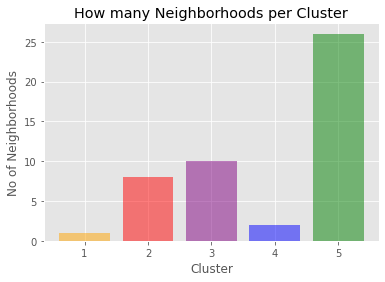

In [188]:
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
performance = edmonton_merged['Cluster_Label'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster_Label'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.5, color=['orange','red','purple','blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')
# add the annotations
#for y, x in zip(performance, y_pos):
 #   plt.annotate(f'{y}\n', xy=(x, y), ha='center', va='center')

plt.show()

### Analysis of each cluster

### *Cluster1*

In [189]:
cluster1=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 0, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster1

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
23,TWIN BROOKS,0,Playground,Yoga Studio,Japanese Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,0.0


### *Cluster 2*

In [190]:
cluster2=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 1, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster2

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
4,BLUE QUILL,1,Convenience Store,Gym,Pizza Place,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
11,HADDOW,1,Yoga Studio,Pizza Place,Convenience Store,Park,Gift Shop,Fast Food Restaurant,Garden Center,Gas Station,Grocery Store,Dry Cleaner,Gym,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
15,MACEWAN,1,Playground,Liquor Store,Convenience Store,Spa,Gift Shop,Electronics Store,Fast Food Restaurant,Garden Center,Gas Station,Yoga Studio,Grocery Store,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,0.0
16,RAMSAY HEIGHTS,1,Park,Skate Park,Convenience Store,Cheese Shop,Dry Cleaner,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Yoga Studio,Grocery Store,Gym,Home Service,Hotel,Ice Cream Shop,0.0
21,SWEET GRASS,1,Convenience Store,Gym,Pizza Place,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
35,RICHFORD,1,Convenience Store,Stadium,Gas Station,Yoga Studio,Grocery Store,Electronics Store,Fast Food Restaurant,Garden Center,Gift Shop,Gym,Dog Run,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
40,GLENRIDDING AREA,1,Convenience Store,Fast Food Restaurant,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,0.0
46,BLACKMUD CREEK RAVINE,1,Convenience Store,Playground,Electronics Store,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,0.0


### *Cluster 3*

In [191]:
cluster3=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 2, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster3

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
0,AMBLESIDE,2,Park,Construction & Landscaping,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
2,BLACKBURNE,2,Construction & Landscaping,Playground,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
25,WINDERMERE,2,Construction & Landscaping,Pub,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
27,CARTER CREST,2,Construction & Landscaping,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
32,MACTAGGART,2,BBQ Joint,Construction & Landscaping,Yoga Studio,Gym,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Grocery Store,Home Service,Dry Cleaner,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
34,OGILVIE RIDGE,2,Construction & Landscaping,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
36,ALLARD,2,Construction & Landscaping,Pizza Place,Massage Studio,Coffee Shop,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
37,CALLAGHAN,2,Construction & Landscaping,ATM,Pharmacy,Hotel,Coffee Shop,Gift Shop,Fast Food Restaurant,Garden Center,Gas Station,Grocery Store,Dry Cleaner,Gym,Home Service,Ice Cream Shop,Indian Restaurant,0.0
38,WINDERMERE AREA,2,Construction & Landscaping,Pub,Yoga Studio,Dry Cleaner,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
44,KESWICK AREA,2,Construction & Landscaping,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0


### *Cluster 4*

In [192]:
cluster4=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 3, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster4

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
9,ERMINESKIN,3,Grocery Store,Coffee Shop,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.5
41,HERITAGE VALLEY TOWN CENTRE AREA,3,Grocery Store,Yoga Studio,Wine Shop,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,1.0


### *Cluster 5*

In [193]:
cluster5=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 4, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster5

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
1,BEARSPAW,4,Lake,Outdoors & Recreation,Japanese Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,0.0
3,BLACKMUD CREEK,4,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gym,Dry Cleaner,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
5,BRANDER GARDENS,4,Café,School,Home Service,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Yoga Studio,Dry Cleaner,Gym,Hotel,Ice Cream Shop,Indian Restaurant,0.0
6,BROOKSIDE,4,Pub,Park,Soccer Field,Gift Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Garden Center,Gas Station,Yoga Studio,Dog Run,Gym,Home Service,Hotel,Ice Cream Shop,0.0
7,BULYEA HEIGHTS,4,Pizza Place,Baby Store,Park,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
8,CHAPPELLE AREA,4,Insurance Office,Yoga Studio,Wine Shop,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,Electronics Store,0.0
10,FALCONER HEIGHTS,4,Pizza Place,Coffee Shop,Smoothie Shop,Fast Food Restaurant,Sandwich Place,Grocery Store,Indian Restaurant,Asian Restaurant,Home Service,Gym,Hotel,Dry Cleaner,Gift Shop,Gas Station,Ice Cream Shop,0.1
12,HODGSON,4,Restaurant,Discount Store,Ice Cream Shop,Japanese Restaurant,Wine Shop,Bridal Shop,Bus Station,Italian Restaurant,Insurance Office,Indian Restaurant,Asian Restaurant,Hotel,Home Service,Gym,Grocery Store,0.0
13,KEHEEWIN,4,Pizza Place,Tea Room,Sandwich Place,Fast Food Restaurant,Yoga Studio,Gift Shop,Electronics Store,Garden Center,Gas Station,Grocery Store,Dog Run,Gym,Home Service,Hotel,Ice Cream Shop,0.0
14,LEGER,4,Gym,Salon / Barbershop,Ice Cream Shop,Bus Station,Coffee Shop,Gift Shop,Fast Food Restaurant,Garden Center,Gas Station,Yoga Studio,Grocery Store,Dry Cleaner,Home Service,Hotel,Indian Restaurant,0.0


### Determing the average number of grocery stores per cluster

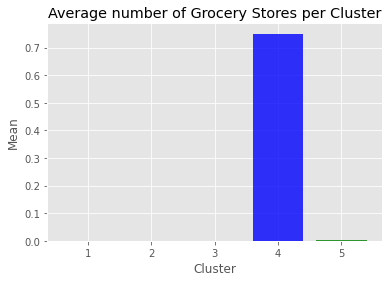

In [194]:
clusters_mean = [cluster1['Grocery Store'].mean(),cluster2['Grocery Store'].mean(),cluster3['Grocery Store'].mean(),
                 cluster4['Grocery Store'].mean(),cluster5['Grocery Store'].mean()]
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['orange','red','purple','blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Grocery Stores per Cluster')

plt.show()

### **Results and Discussion**

The objective of the business problem was to help stakeholders identify one of the safest borough(region) in Edmonton, and an appropriate neighborhood within the borough to set up a commercial establishment especially a Grocery store. This has been achieved by first making use of Edmonton crime data to identify a safe borough with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood. 

Most of the grocery stores are in *cluster4* represented by *blue* clusters. The neighbourhoods *HERITAGE VALLEY TOWN CENTRE AREA, ERMINESKIN, FALCONER HEIGHTS* have highest average grocery stores. Even though there are huge amount of neighborhoods in *cluster5* and *cluster3*, there is little to no Grocery store. Looking at the nearby venues, the **optimum place to put a grocery store** are in __cluster5__ neighborhoods *HODGSON, RUTHERFORD, SKYRATTLER, SOUTH TERWILLEGAR, STEINHAUER, CASHMAN, DESROCHERS AREA, PAISLEY, GRAYDON HILL* as there are many Neighborhoods in the area but little to no grocery store therefore, eliminating any competition. Having **26 neighborhoods in the area with no Grocery store** gives a good opportunity for opening a new grocery store. This concludes the optimal finding for the project. I recommend the entrepreneur to open a grocery store in the above mentioned locations with no competitions. If the price and quality of the products are affordable and great, I m confident that the new grocery store will have great following.

#### **Conclusion**

We have explored the crime data to understand different types of crimes in all neighborhoods of Edmonton and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.